## Séries Temporáis

https://www.youtube.com/watch?v=28dG0gyXz80

Bibliotecas para minerar dados financeiros:
Yfinance  
Pybovespa  
quandl  
Pandas Finance  
pandas data_reader  

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

In [18]:
# Puxando cotações

inter  = '1d' # Intervalo
inicio = '2019-01-01'
fim    = '2021-01-01'

tickets = {
    'ticket0' : yf.Ticker('GGBR4.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket1' : yf.Ticker('GGBR3.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket2' : yf.Ticker('VALE3.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket3' : yf.Ticker('USIM5.SA').history(interval=inter, start=inicio, end=fim), 
    'ticket4' : yf.Ticker('CSNA3.SA').history(interval=inter, start=inicio, end=fim)
}



In [19]:
# Transformando em dataframes
DFGGBR4 = tickets['ticket0']
DFGGBR3 = tickets['ticket1']
DFVALE3 = tickets['ticket2']
DFUSIM5 = tickets['ticket3']
DFCSNA3 = tickets['ticket4']

# Criando uma lista com os daframes
DFS = [DFGGBR4, DFGGBR3, DFVALE3, DFUSIM5, DFCSNA3]

In [20]:
df = DFS[1]

In [21]:
df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-02:00,9.628127,9.745068,9.339672,9.682699,47000,0.0,0
2019-01-03 00:00:00-02:00,9.589146,9.823028,9.402041,9.472205,63600,0.0,0
2019-01-04 00:00:00-02:00,9.480003,9.807437,9.480003,9.651516,43000,0.0,0


In [22]:
df[['Close']].info() # Selecionei só uma coluna, que é diferente disso aqui: df['Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2019-01-02 00:00:00-02:00 to 2020-12-30 00:00:00-03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   496 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


## Decompondo nossa série

In [23]:
df[['Close']].head()

,Close
Date,
2019-01-02 00:00:00-02:00,9.682699
2019-01-03 00:00:00-02:00,9.472205
2019-01-04 00:00:00-02:00,9.651516
2019-01-07 00:00:00-02:00,9.721680
2019-01-08 00:00:00-02:00,9.674905


In [24]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

In [25]:
decomposicao.seasonal

Date
2019-01-02 00:00:00-02:00   -0.028618
2019-01-03 00:00:00-02:00   -0.029700
2019-01-04 00:00:00-02:00   -0.054127
2019-01-07 00:00:00-02:00    0.015303
2019-01-08 00:00:00-02:00    0.004065
                               ...   
2020-12-22 00:00:00-03:00   -0.065277
2020-12-23 00:00:00-03:00   -0.126519
2020-12-28 00:00:00-03:00   -0.129260
2020-12-29 00:00:00-03:00   -0.096837
2020-12-30 00:00:00-03:00    0.014366
Name: seasonal, Length: 496, dtype: float64

<AxesSubplot:xlabel='Date'>

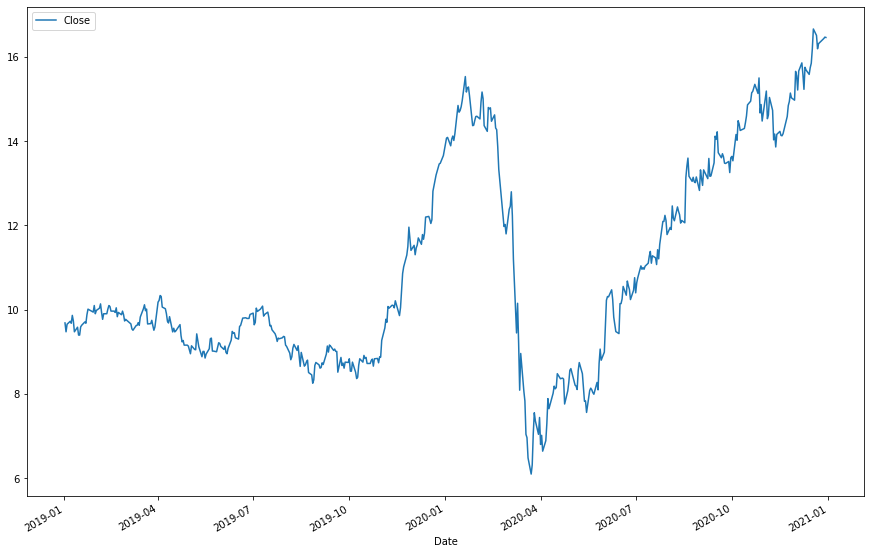

In [26]:
df[['Close']].plot(figsize=(15,10))

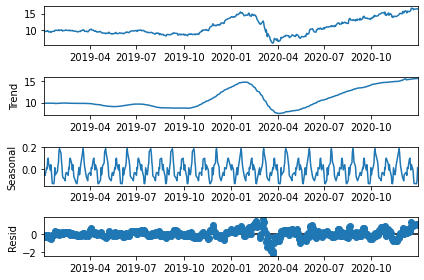

In [31]:
decomposicao.plot();